# Identify 3 iris flowers using SVM

Data comes from: https://archive.ics.uci.edu/ml/datasets/iris

Step 1: Load the dataset

In [1]:
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()

In [2]:
dir(iris) # to display the data structure of the whole so-called iris

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [3]:
iris.feature_names # to show what are the features in the dataset

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [4]:
# to create the dataset for processing
df = pd.DataFrame(iris.data, columns=iris.feature_names)
# to display top 5 rows to double check
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
# to append the label to the dataset
df['target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [6]:
# to find out what 0, 1 and 2 means
iris.target_names # 0=setosa, 1=versicolor, 2=virginica

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [7]:
len(df) #find out how many rows I have

150

In [8]:
df[df.target == 0].head() #display first 5 lines in setosa

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [9]:
df[df.target == 1].head()#display first 5 lines in versicolor

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1


In [10]:
df[df.target == 2].head() #display first 5 lines in virginica

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
100,6.3,3.3,6.0,2.5,2
101,5.8,2.7,5.1,1.9,2
102,7.1,3.0,5.9,2.1,2
103,6.3,2.9,5.6,1.8,2
104,6.5,3.0,5.8,2.2,2


In [11]:
#I Want to plot out the data to get some visualization
from matplotlib import pyplot as plt
#I want to plot to in the same html file
%matplotlib inline

In [12]:
#create three datasets
df0 = df[df.target == 0]
df1 = df[df.target == 1]
df2 = df[df.target == 2]

In [13]:
df0.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


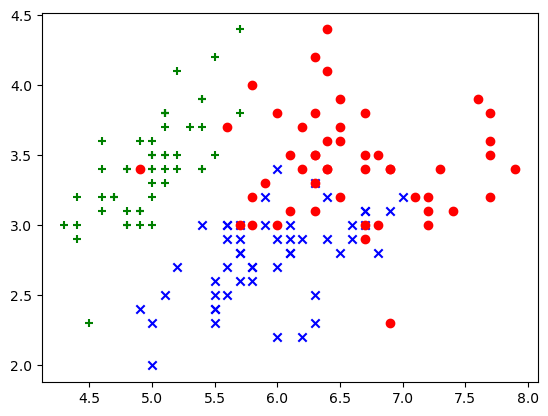

In [14]:
plt.scatter(df0['sepal length (cm)'],df0['sepal width (cm)'], color='green', marker='+' )
plt.scatter(df1['sepal length (cm)'],df1['sepal width (cm)'], color='blue', marker='x' )
plt.scatter(df2['sepal length (cm)'],df0['sepal width (cm)'], color='red', marker='o' )

Step 2: Prepare the dataset for ML

In [15]:
from sklearn.model_selection import train_test_split
# train_test_split is to randomly select 0.x amount of data for testing purpuse

In [16]:
X = df.drop('target', axis='columns')
y = df.target
#alway upper case X and lower case y

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [18]:
len(X_train)

120

In [19]:
len(X_test)

30

Step 3: Do the SVMix

In [20]:
from sklearn.preprocessing import scale
X_train_scaled = scale(X_train)
X_test_scaled = scale(X_test)

In [21]:
from sklearn.svm import SVC
clf_svm = SVC()
clf_svm.fit(X_train_scaled, y_train)

SVC()

In [22]:
y_pred = clf_svm.predict(X_test_scaled)


Step 4: Read/Visualize results --- print out confusion matrix

In [23]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[11,  0,  0],
       [ 0,  8,  5],
       [ 0,  0,  6]], dtype=int64)

C:\Users\sahua\miniconda3\envs\tf\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


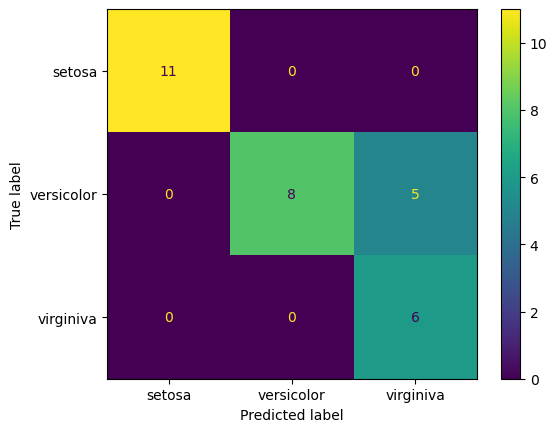

In [24]:
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf_svm, X_test_scaled, y_test, display_labels=['setosa','versicolor','virginiva'])